In [24]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats

In [25]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path (update with your actual file path)
file_path = '/content/drive/MyDrive/Colab Notebooks/CourseWork/bank-additional-full.csv'

# Read the CSV file
df = pd.read_csv(file_path,delimiter=';')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
# print first 5 rows
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [27]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Remove duration column

1.   List item
2.   List item

In [28]:
df = df.drop('duration', axis=1)

In [29]:
# print first 5 rows
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Checking for unique values

In [30]:
print(df['marital'].unique())
print(df['job'].unique())
print(df['education'].unique())
print(df['default'].unique())
print(df['y'].unique())

['married' 'single' 'divorced' 'unknown']
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
['no' 'unknown' 'yes']
['no' 'yes']


# Checking null values

---
# check if there is any nulll values in data set

In [31]:
df.isnull()
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


# Checking for missing values

1.   [List item](https://)
2.   List item

In [32]:
# find if there any missing values

categorical_variables = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']
numerical_variables = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

#####  using bar plots

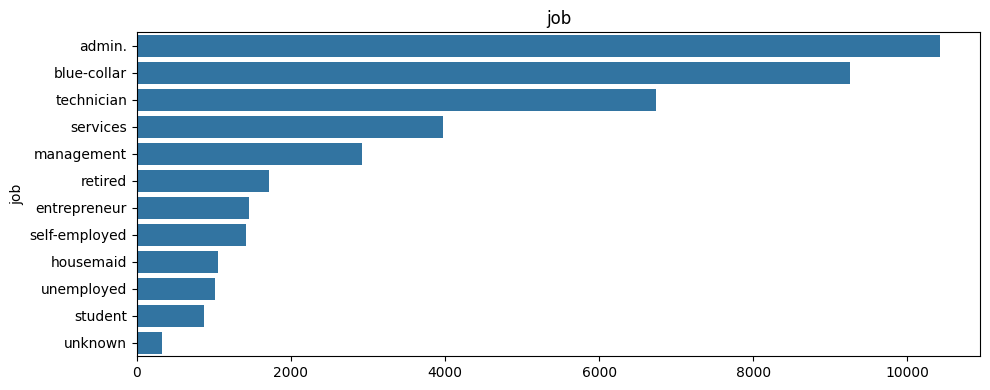

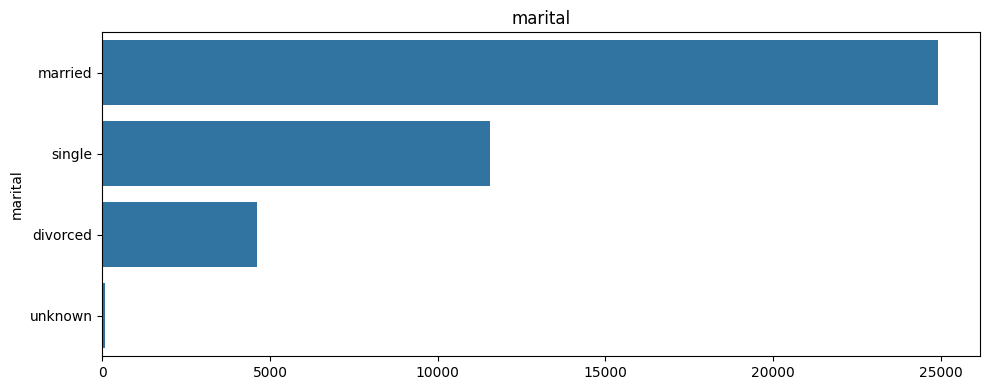

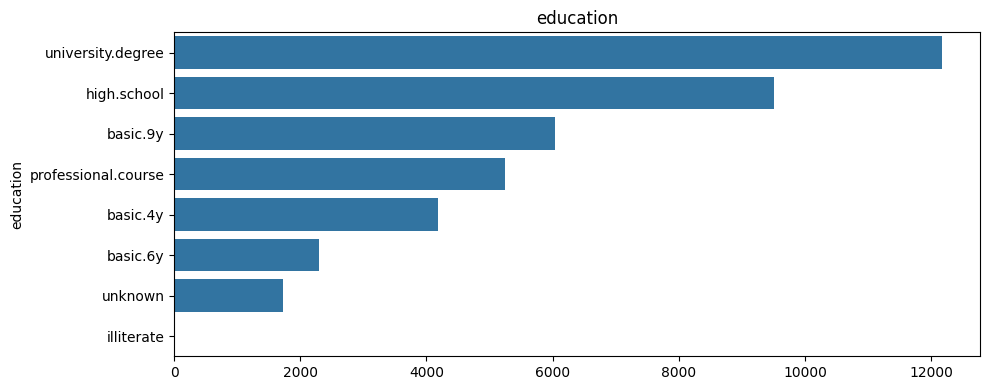

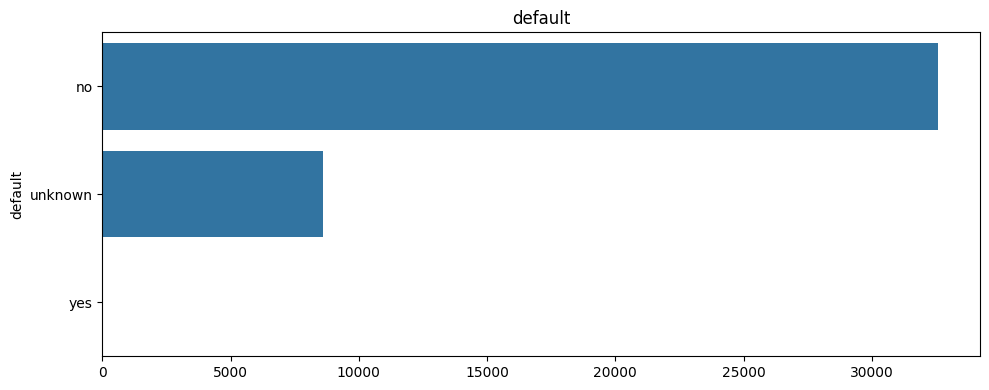

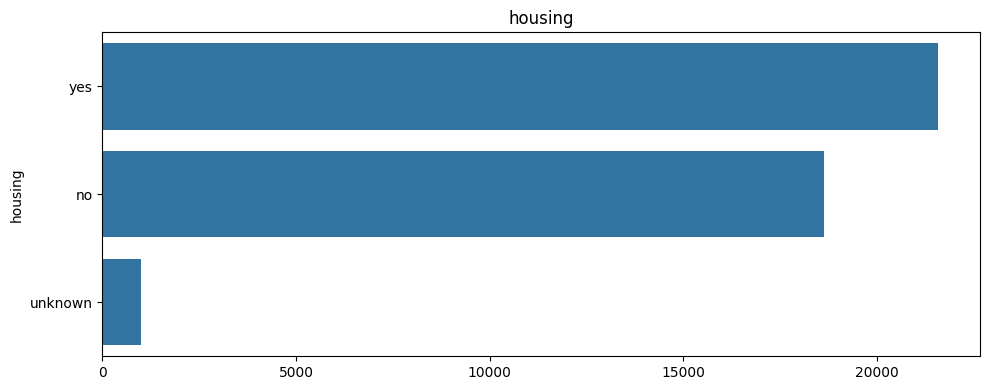

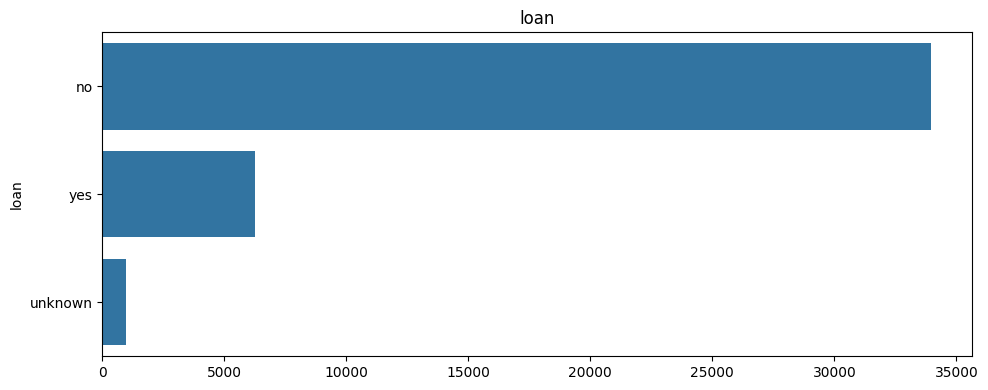

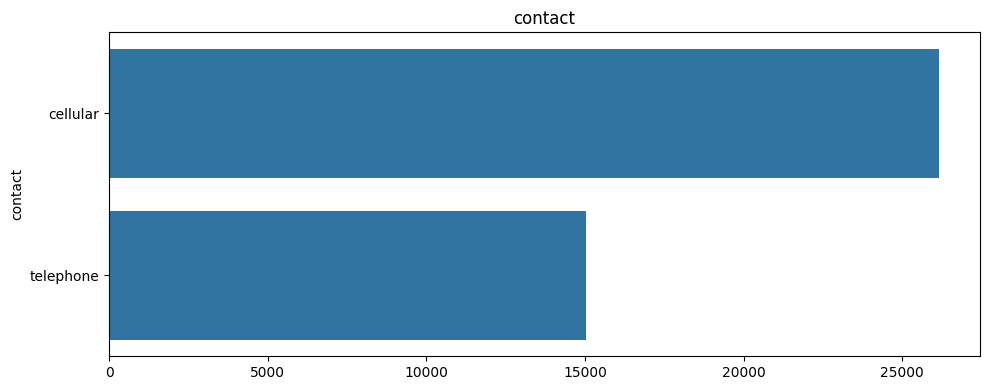

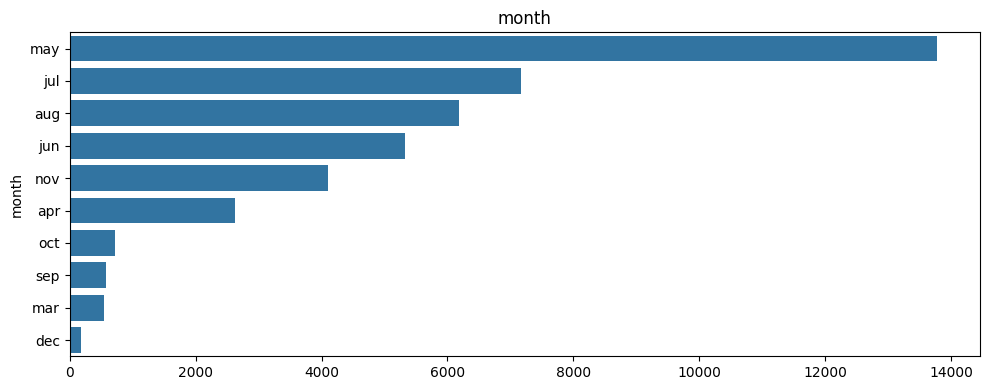

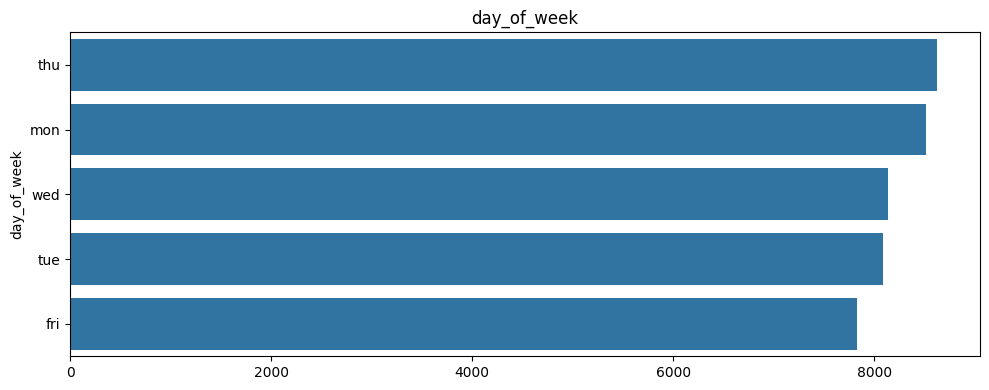

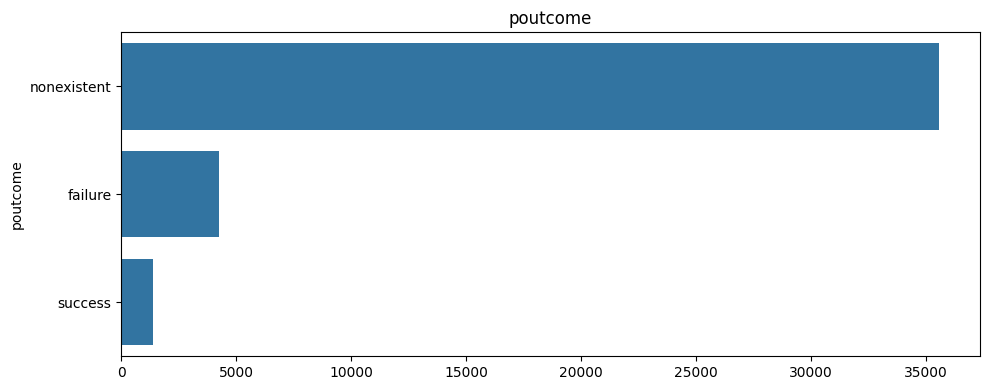

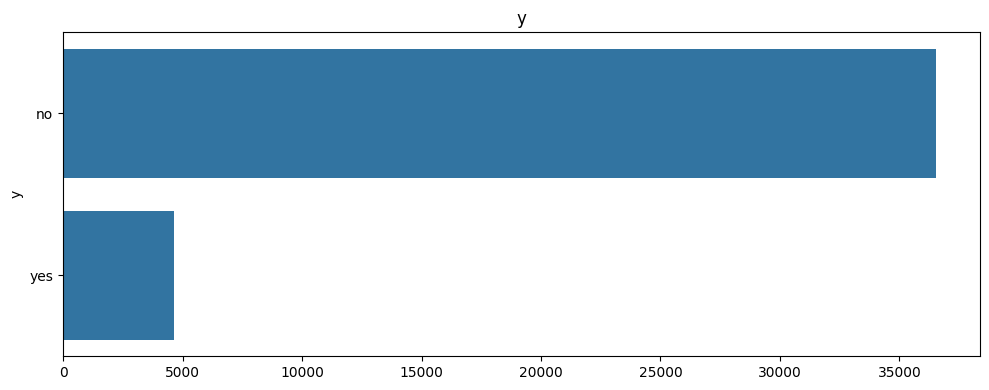

In [33]:
# Create bar plots for each categorical column
for col in categorical_variables:

# Check if the column is of a categorical data type
 if df[col].dtype in ['object', 'category']:

# Create bar plot
  plt.figure(figsize=(10, 4))
  sns.barplot(x=df[col].value_counts().values, y=df[col].value_counts().index)
  plt.title(col)
  plt.tight_layout()
  plt.show()
else:
# Print a warning message if the column is not categorical
 print(f"Warning: Column '{col}' is not categorical and cannot be plotted.")

```
# This is formatted as code
```

# Handling unknown values

In [34]:
# categorical_cols = ['job', 'education']
# for col in categorical_cols:
#     df[col] = df[col].replace('unknown', np.nan)

# # Impute missing values with mode
# imputer = SimpleImputer(strategy='most_frequent')
# df[categorical_cols] = imputer.fit_transform(df[categorical_cols])

In [35]:
# handling unknown values - marital status
# df.drop(df[df['marital'] == "unknown"].index, inplace=True)

In [36]:
# categorical_cols = ['job', 'education']
# for col in categorical_cols:
#     df[col] = df[col].replace('unknown', np.nan)

# # Impute missing values with mode
# imputer = SimpleImputer(strategy='most_frequent')
# df[categorical_cols] = imputer.fit_transform(df[categorical_cols])

# Checking for outliers

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'emp.var.rate'}>,
        <Axes: title={'center': 'cons.price.idx'}>],
       [<Axes: title={'center': 'cons.conf.idx'}>,
        <Axes: title={'center': 'euribor3m'}>,
        <Axes: title={'center': 'nr.employed'}>]], dtype=object)

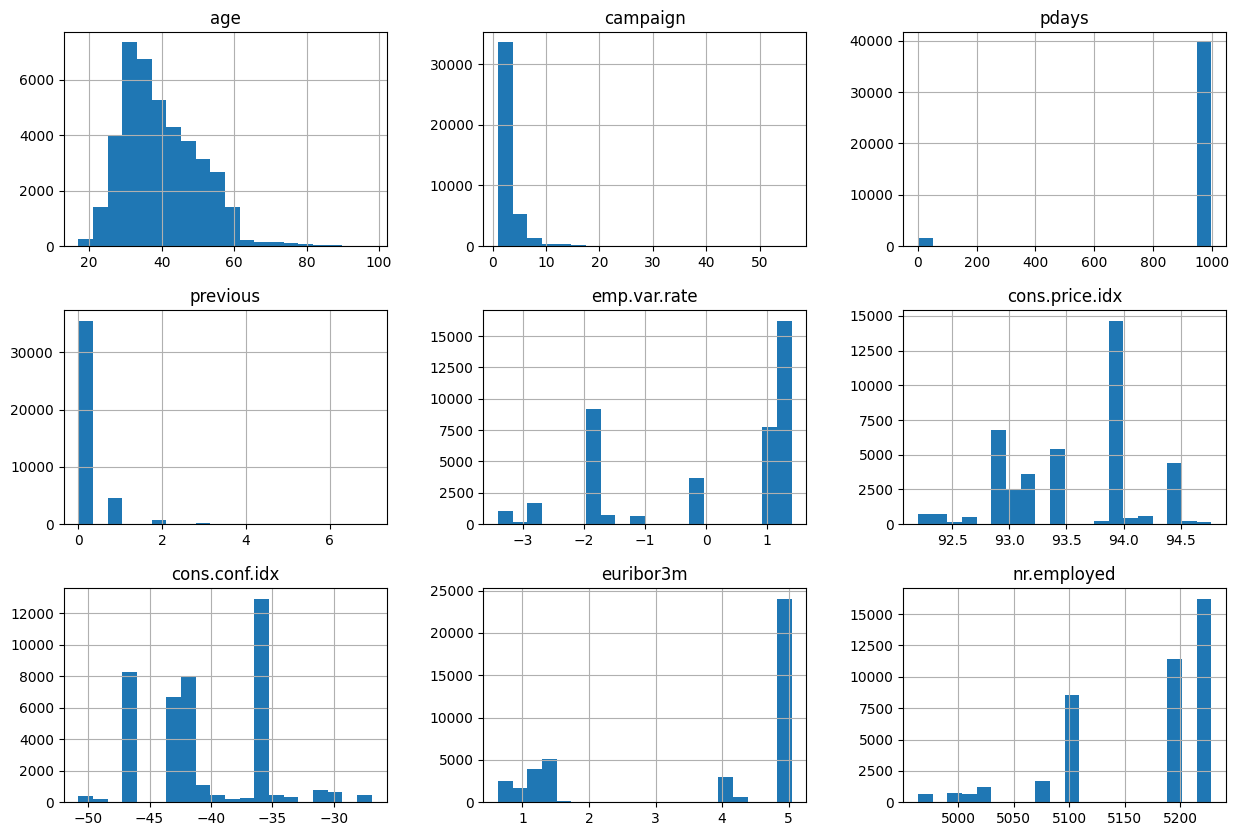

In [37]:
df.hist(figsize=(15, 10), bins=20)

# This is formatted as code


#### using boxplots

In [38]:
numerical_columns = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

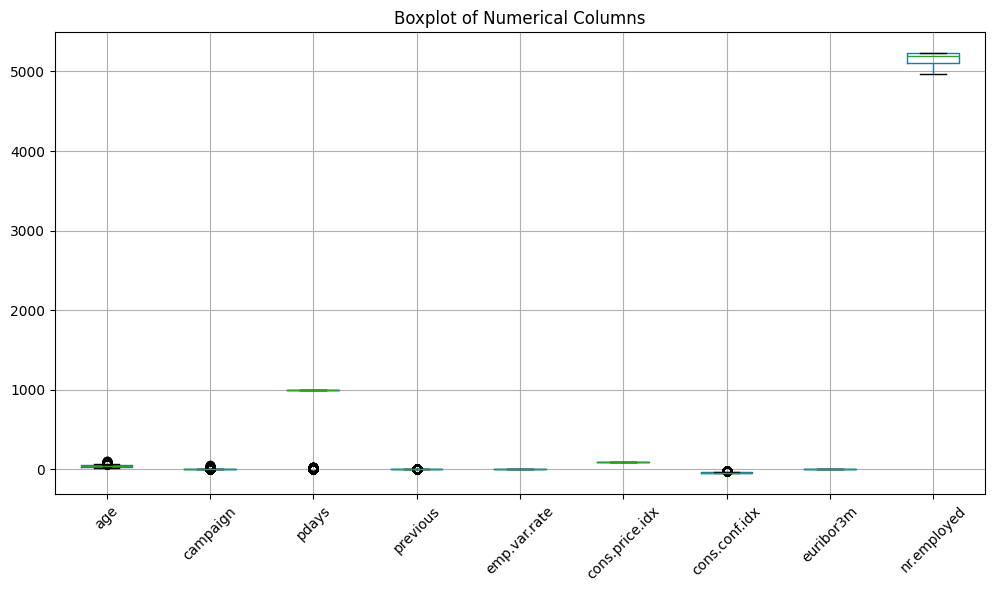

In [39]:
# initialize a new figure
plt.figure(figsize=(12, 6))
# creating a boxplot for numerical columns
df[numerical_columns].boxplot()
# rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Columns')
plt.show()

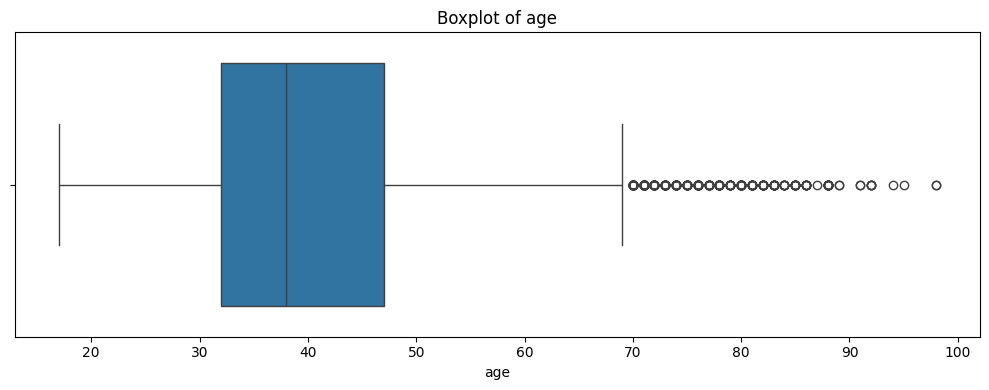

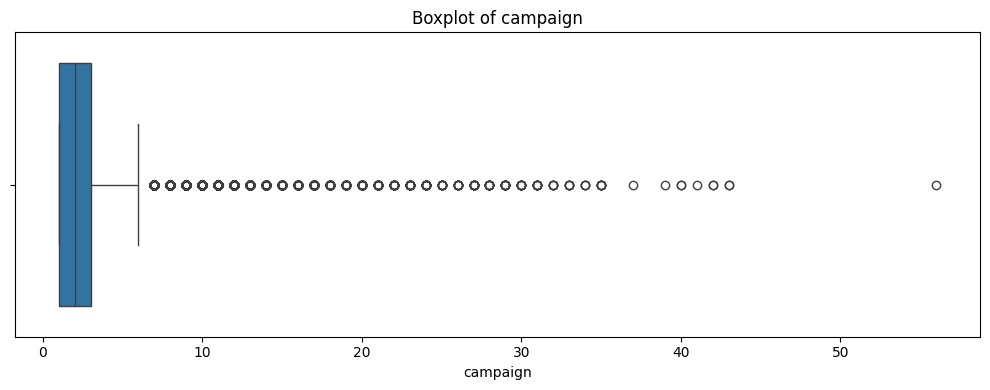

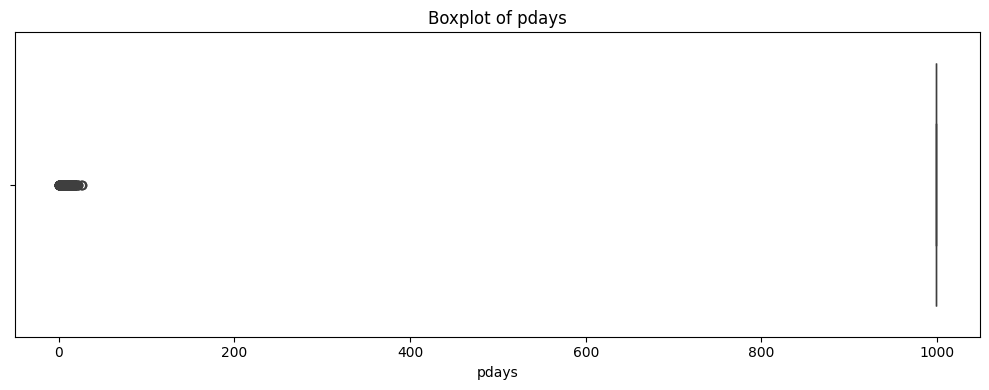

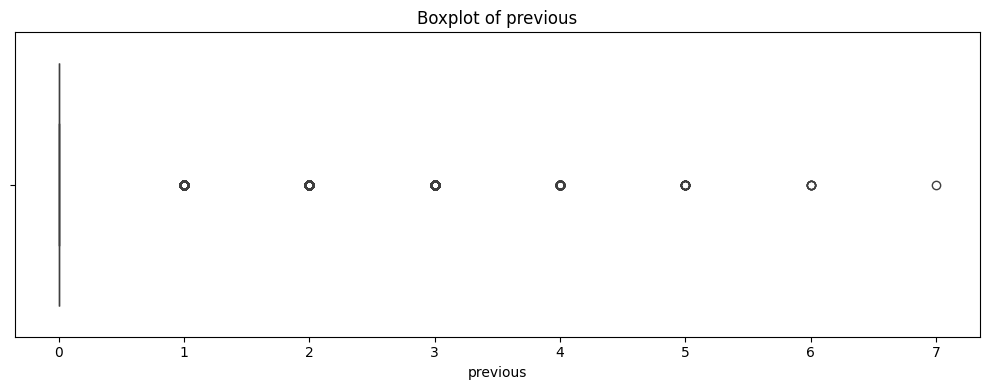

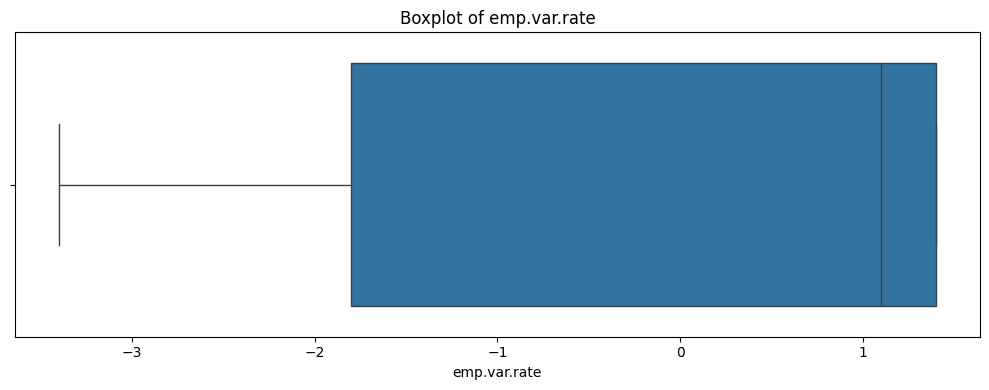

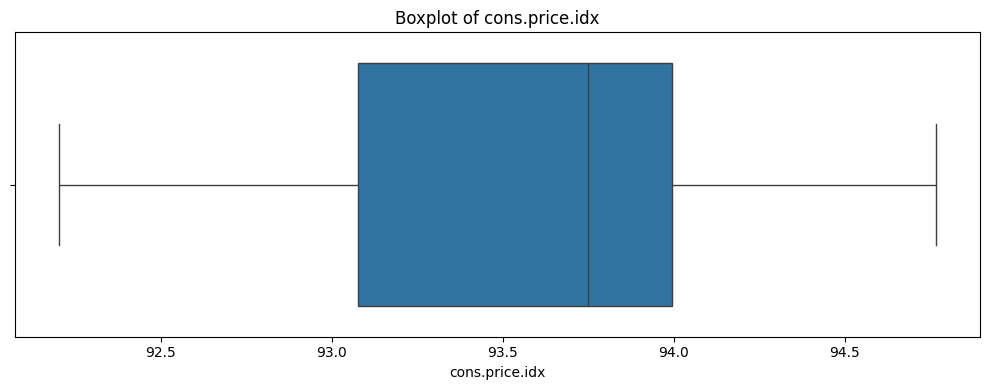

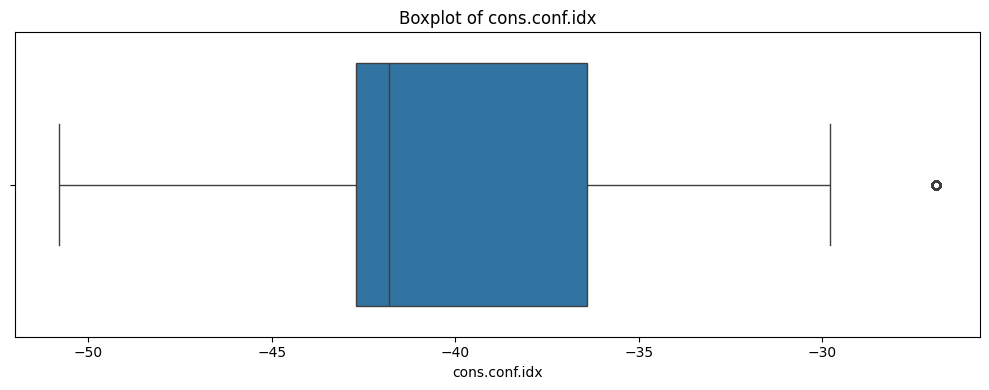

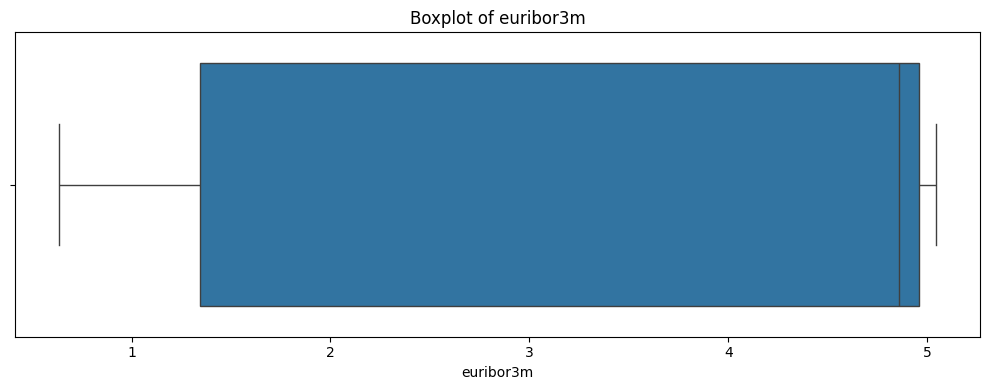

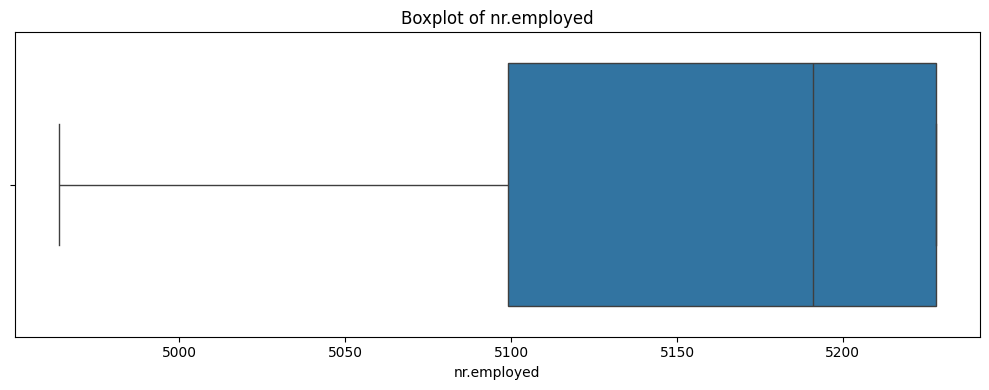

In [40]:
# Visualizing outliers using boxplots for numerical columns


for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

Previous Shape With Outlier: (41188, 20)
Q1: 32.0 Q3: 47.0
IQR: 15.0
New Shape After Removing Outliers: (40719, 20)


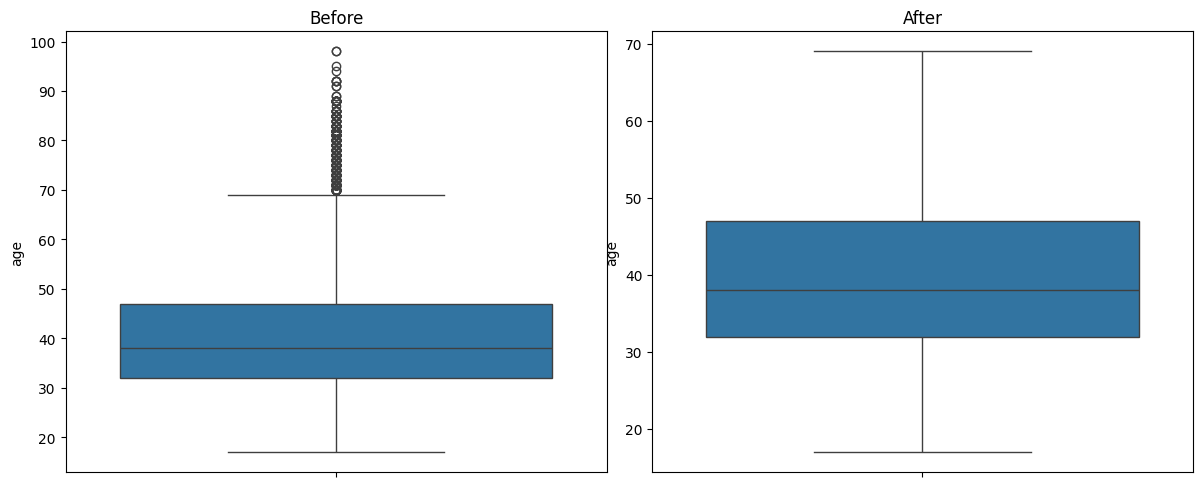

In [42]:
warnings.filterwarnings("ignore")

df_set = df.copy()

# Plotting before handling outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plt.tight_layout(w_pad=0.2)  # Use w_pad for spacing

print("Previous Shape With Outlier:", df_set.shape)

sns.boxplot(y=df_set['age'], ax=axes[0])
axes[0].set_title("Before")

# Handling Outliers using IQR
Q1 = df_set['age'].quantile(0.25)
Q3 = df_set['age'].quantile(0.75)
IQR = Q3 - Q1

print("Q1:", Q1, "Q3:", Q3)
print("IQR:", IQR)

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Removing outliers
df_cleaned = df_set[(df_set['age'] >= lower_limit) & (df_set['age'] <= upper_limit)]
df_set = df_cleaned

# min_age = df_set['age'].min()
# max_age = df_set['age'].max()

# print(f"Minimum age: {min_age}")
# print(f"Maximum age: {max_age}")

print("New Shape After Removing Outliers:", df_cleaned.shape)

# Plotting after handling outliers
sns.boxplot(y=df_cleaned['age'], ax=axes[1])
axes[1].set_title("After")

# Show the plot
plt.show()

Previous Shape With Outlier: (40719, 20)
New Shape After Removing Outliers in campaign: (38327, 20)
New Shape After Removing Outliers in previous: (33002, 20)


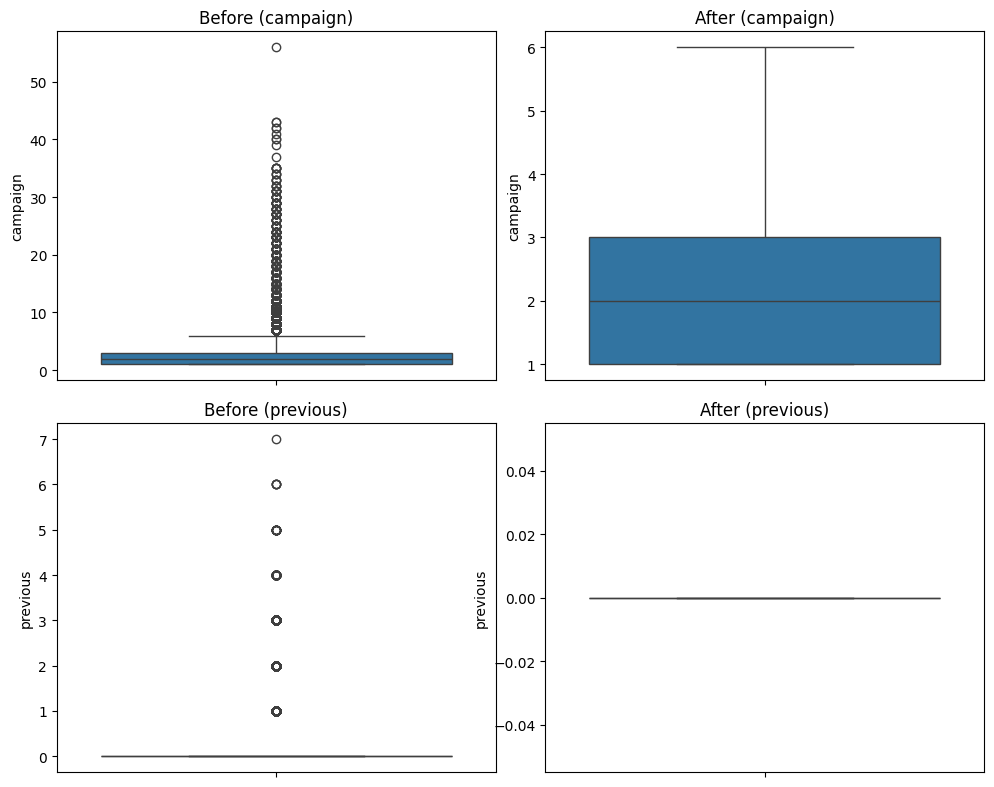

In [43]:
columns_to_clean = ['campaign', 'previous']

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
plt.tight_layout(w_pad=0.5, h_pad=1)

print("Previous Shape With Outlier:", df_set.shape)

for i, col in enumerate(columns_to_clean):
    sns.boxplot(y=df_set[col], ax=axes[i, 0])
    axes[i, 0].set_title(f"Before ({col})")

    # Compute IQR
    Q1 = df_set[col].quantile(0.25)
    Q3 = df_set[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Removing outliers
    df_set = df_set[(df_set[col] >= lower_limit) & (df_set[col] <= upper_limit)]

    print(f"New Shape After Removing Outliers in {col}:", df_set.shape)

    # Plot after removing outliers
    sns.boxplot(y=df_set[col], ax=axes[i, 1])
    axes[i, 1].set_title(f"After ({col})")

# Show the plot
plt.show()

In [44]:
df_set['pdays'] = df_set['pdays'].apply(lambda x: 0 if x == 999 else 1)

df_set

# print(df_set.columns)
# print(df_set['pdays'].isnull().sum())
# print(df_set['pdays'].dtype)
# print(df_set['pdays'].head())


# df_set['pdays'].unique()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,2,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


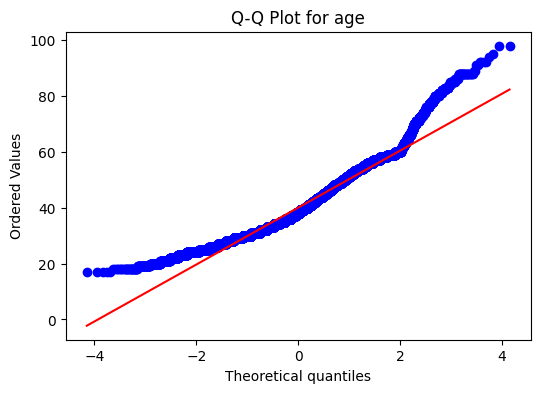

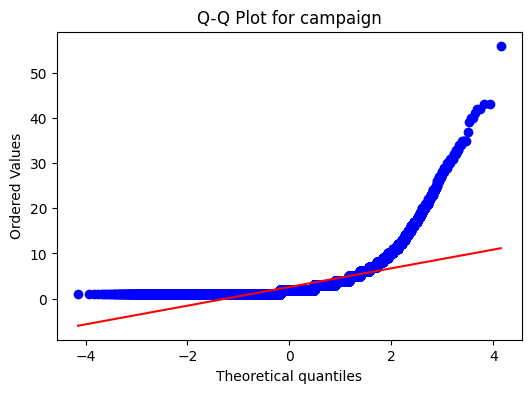

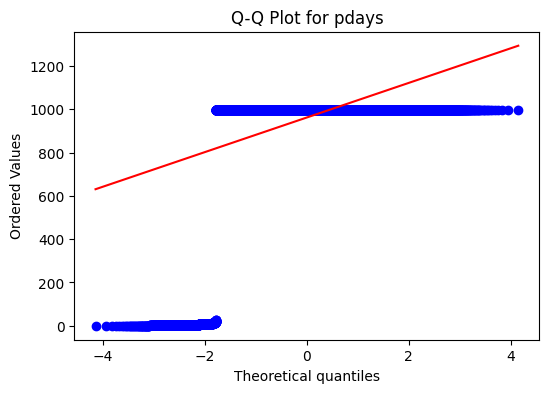

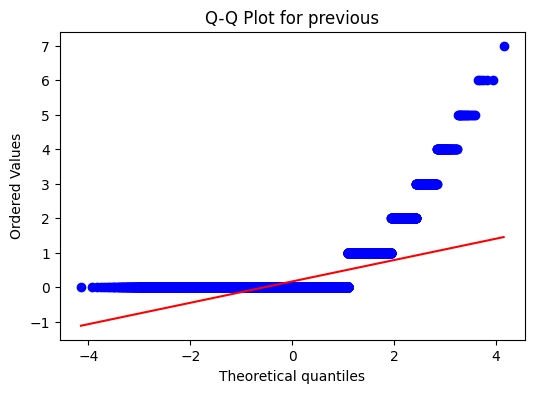

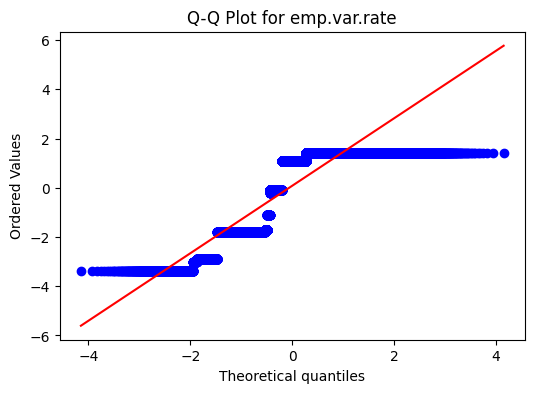

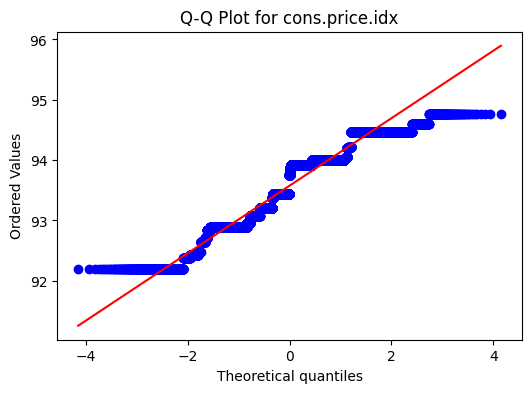

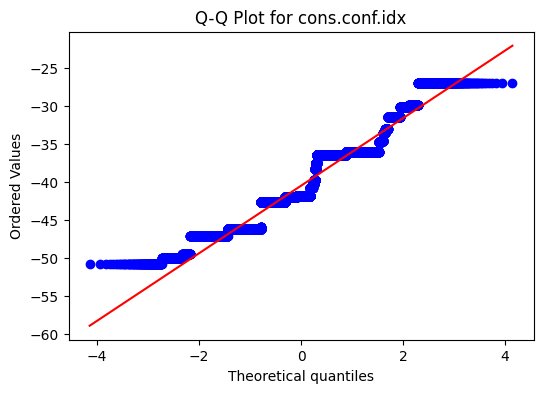

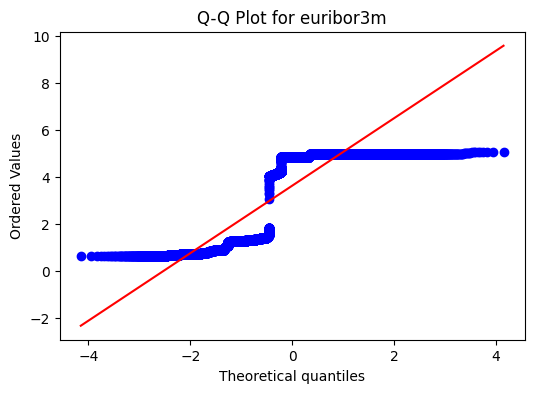

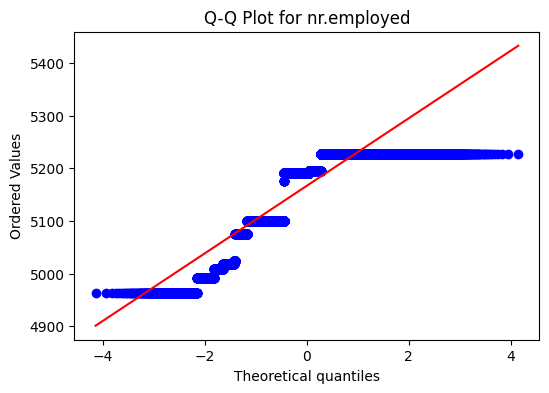

In [45]:
# Q-Q Plot for each numerical feature
numerical_features = ['age', 'campaign', 'pdays', 'previous',
                      'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                      'euribor3m', 'nr.employed']

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {feature}')
    plt.show()
